In [1]:
import geopandas as gpd
from shapely.geometry import Point
import plotly.graph_objects as go
import plotly.express as px

d:\Software\anaconda3\envs\GIS\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
data = gpd.read_file(r"E:\Data\澳大利亚火灾\fire_nrt_M6_96619.csv")
data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,geometry
0,-14.281,143.636,323.9,1.7,1.3,2019-10-01,0025,Terra,MODIS,70,6.0NRT,302.3,26.8,D,None
1,-14.284,143.532,343.5,1.7,1.3,2019-10-01,0025,Terra,MODIS,90,6.0NRT,306.3,84.3,D,None
2,-14.302,143.706,320.2,1.7,1.3,2019-10-01,0025,Terra,MODIS,30,6.0NRT,305,14.1,D,None
3,-14.283,143.652,320.4,1.7,1.3,2019-10-01,0025,Terra,MODIS,57,6.0NRT,303.3,18.4,D,None
4,-14.285,143.521,349.4,1.7,1.3,2019-10-01,0025,Terra,MODIS,94,6.0NRT,304.7,110.7,D,None


In [3]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 183593 entries, 0 to 183592
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   latitude    183593 non-null  object  
 1   longitude   183593 non-null  object  
 2   brightness  183593 non-null  object  
 3   scan        183593 non-null  object  
 4   track       183593 non-null  object  
 5   acq_date    183593 non-null  object  
 6   acq_time    183593 non-null  object  
 7   satellite   183593 non-null  object  
 8   instrument  183593 non-null  object  
 9   confidence  183593 non-null  object  
 10  version     183593 non-null  object  
 11  bright_t31  183593 non-null  object  
 12  frp         183593 non-null  object  
 13  daynight    183593 non-null  object  
 14  geometry    0 non-null       geometry
dtypes: geometry(1), object(14)
memory usage: 21.0+ MB


In [4]:
data_19_10_1 = data[data['acq_date']=='2019-10-01']
data_19_10_1

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,geometry
0,-14.281,143.636,323.9,1.7,1.3,2019-10-01,0025,Terra,MODIS,70,6.0NRT,302.3,26.8,D,None
1,-14.284,143.532,343.5,1.7,1.3,2019-10-01,0025,Terra,MODIS,90,6.0NRT,306.3,84.3,D,None
2,-14.302,143.706,320.2,1.7,1.3,2019-10-01,0025,Terra,MODIS,30,6.0NRT,305,14.1,D,None
3,-14.283,143.652,320.4,1.7,1.3,2019-10-01,0025,Terra,MODIS,57,6.0NRT,303.3,18.4,D,None
4,-14.285,143.521,349.4,1.7,1.3,2019-10-01,0025,Terra,MODIS,94,6.0NRT,304.7,110.7,D,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,-29.139,123.008,310.2,1.7,1.3,2019-10-01,1725,Aqua,MODIS,15,6.0NRT,291.3,19.5,N,None
892,-29.144,123.015,305.5,1.7,1.3,2019-10-01,1725,Aqua,MODIS,15,6.0NRT,290.9,13.6,N,None
893,-29.13,122.999,309.4,1.7,1.3,2019-10-01,1725,Aqua,MODIS,43,6.0NRT,291.3,18.8,N,None
894,-28.121,150.479,316.4,2.8,1.6,2019-10-01,2335,Terra,MODIS,69,6.0NRT,300.4,22.9,D,None


In [5]:
data_19_10_1['geometry'] = gpd.points_from_xy(data_19_10_1['longitude'],data_19_10_1['latitude'])
data_19_10_1 = data_19_10_1.set_crs('epsg:4326')

d:\Software\anaconda3\envs\GIS\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [6]:
# data_19_10_1.to_file(r"E:\Data\澳大利亚火灾\data_19_10_1.shp")

In [7]:
df = data_19_10_1
fig = go.Figure(go.Densitymapbox(lat=df.latitude, 
                                 lon=df.longitude, 
                                 z= df.brightness, 
                                 radius=5, 
                                 colorscale ='Reds'))

fig.update_layout(mapbox_style="stamen-terrain",
                  mapbox_center_lon=134,
                  mapbox_center_lat=-25,
                  mapbox_zoom=2.4)

fig.update_layout(title = 'Australian Fires',
                  title_font = dict(size = 20,color = 'FireBrick'),
                  title_x = 0.5)

fig.show()

<Axes: >

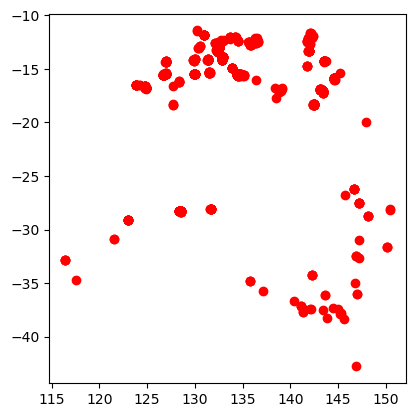

In [11]:
df.plot(color='red')